# Understanding Rock Samples

This notebook aims to demonstrate the structure of my data and the process of extracting 'subsamples' for training our model. \
Specifically, it focuses on rock samples obtained from a CT scan. To simplify the analysis, we will employ a binary representation that denotes two distinct media: pore space and rock.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
from IPython.display import Image
import torch

from utils import *
import pyvista as pv
# pv.start_xvfb()

## How samples are acquired?

Let us look at the big picture to understand the rock samples

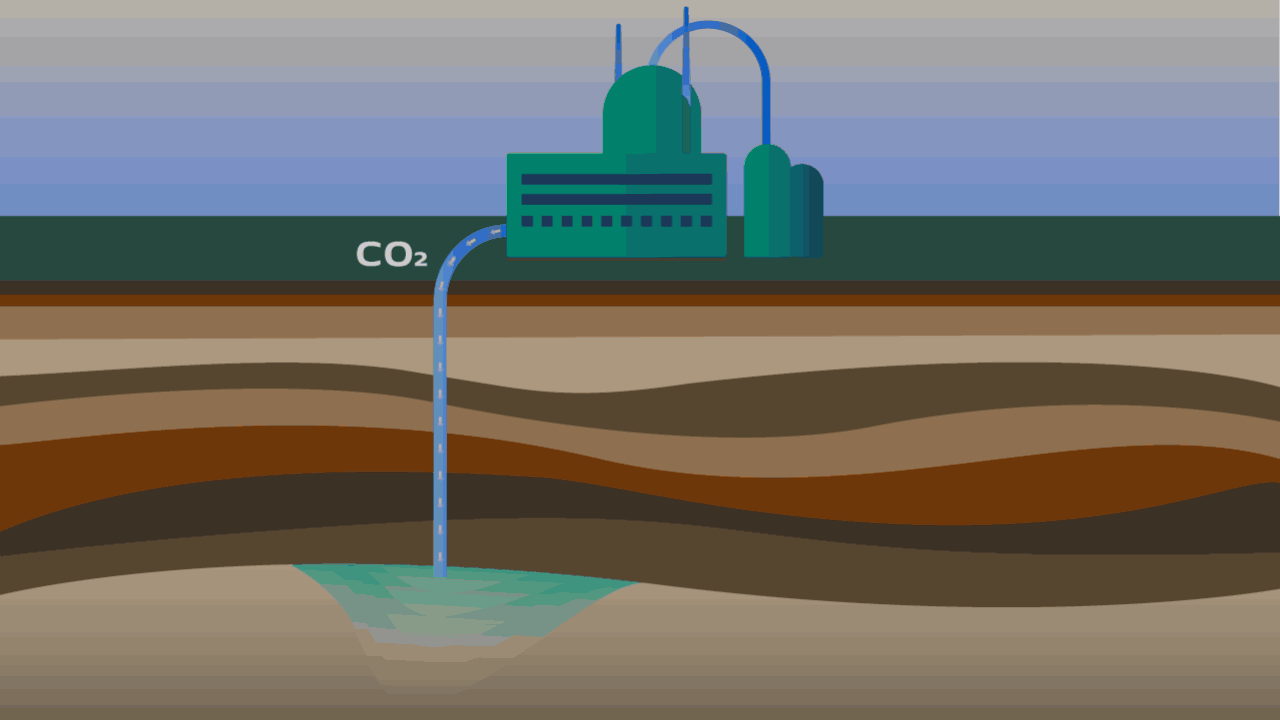

In [2]:
Image(filename='../assets/big_picture_samples.gif',width=1200, height=600)

## Binary Rock Samples

In [3]:
dataset = tiff.imread('../data/berea/berea.tif')
dataset_2 = tiff.imread('../data/beadpack/beadpack.tif') 

Berea dataset (sandstone)

/home/corralma/miniconda3/envs/rockgan2d/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


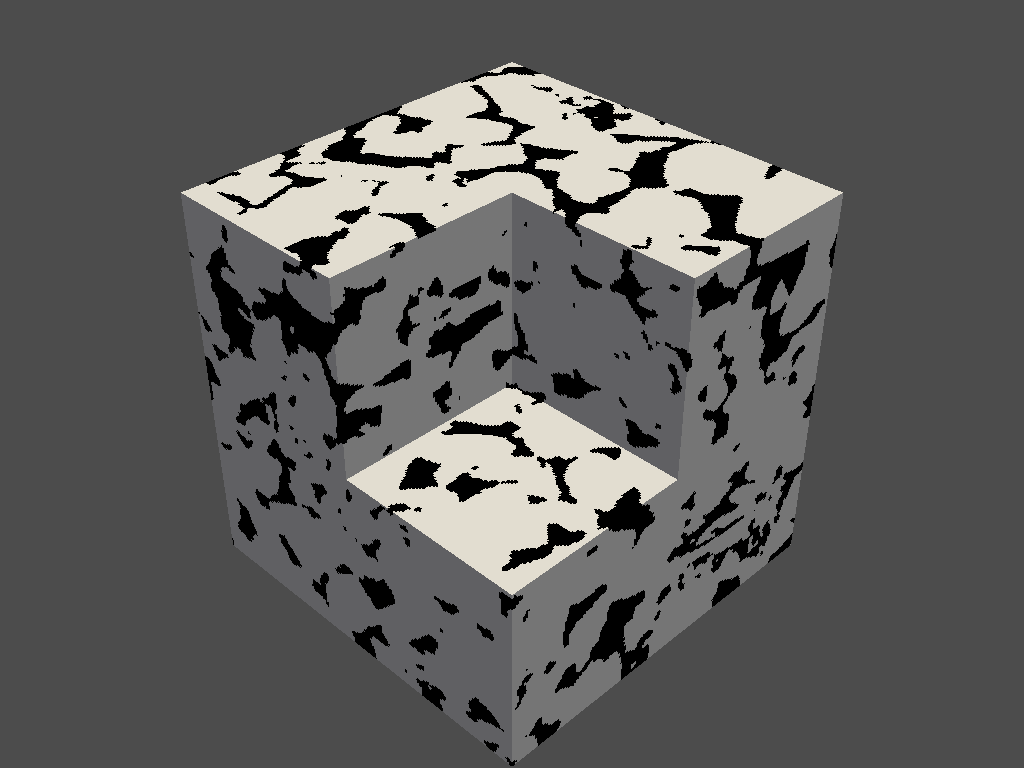

In [4]:
p = pv.Plotter()
grid = pv.UniformGrid(dimensions=(201,201,201))
grid.cell_data["values"] = dataset[:200,:200,:200].flatten() 
clipped = grid.clip_box(factor=0.5)
p.add_mesh(clipped, cmap='gray', show_scalar_bar=False)
# p.camera_position = [-5, 5, 5]
# p.window_size = [1000,1000]
p.show()

Beadpack dataset (synthethic)

/home/corralma/miniconda3/envs/rockgan2d/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


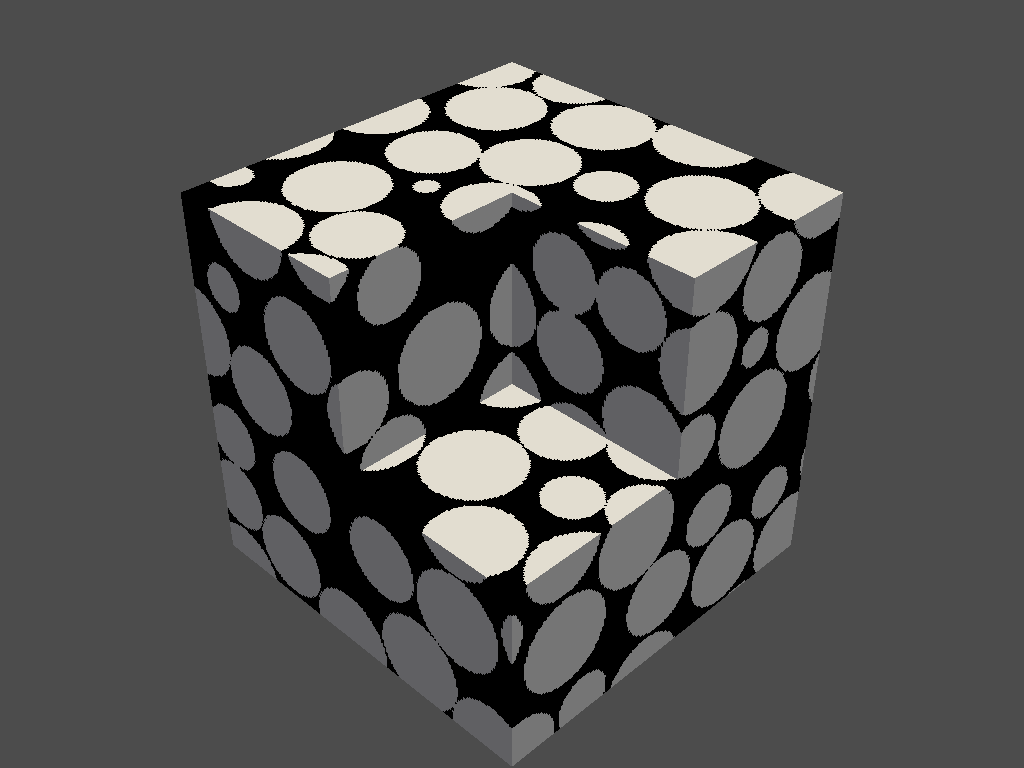

In [5]:
p = pv.Plotter()
grid = pv.UniformGrid(dimensions=(201,201,201))
grid.cell_data["values"] = dataset_2[:200,:200,:200].flatten() 
clipped = grid.clip_box(factor=0.5)
p.add_mesh(clipped, cmap='gray', show_scalar_bar=False)
# p.camera_position = [-5, 5, 5]
# p.window_size = [1000,1000]
p.show()

As depicted, we possess a single 3D sample, aiming to generate corresponding samples belonging to the same media. For this particular instance, we will generate 2D representations exclusively. To construct our dataset, we will extract non-overlapping windows of reduced dimensions (generative models necessitate abundant training samples).

## Subsamples Berea

In [4]:
height, width = 128,128

window_size = (height, width)  # Specify the desired window size
tensor_3d = torch.from_numpy(dataset)  # Convert the 3D array to a PyTorch tensor
tensor_4d = tensor_3d.unsqueeze(0).unsqueeze(0)  # Add dimensions for batch and channels
windows = tensor_4d.unfold(2, window_size[0], window_size[0]).unfold(3, window_size[1], window_size[1])
windows = windows.reshape(-1, 1, window_size[0], window_size[1])/255  # Reshape the windows tensor


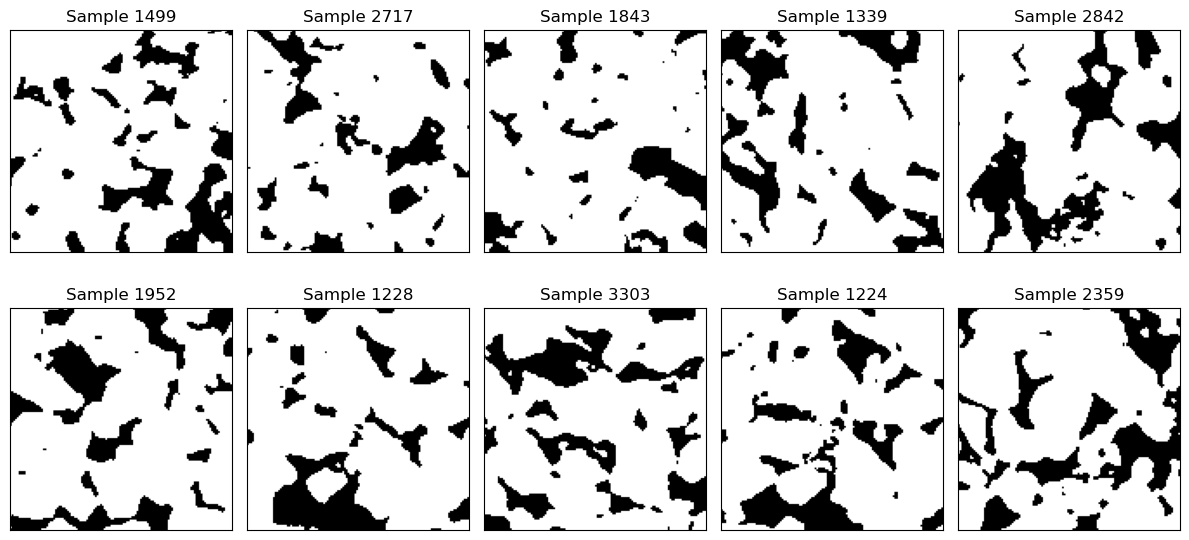

In [5]:
fig = plot_random_samples(windows, num_plots=10)  # Plot 10 random samples

## Subsamples Beadpack

In [8]:
height, width = 128,128

window_size = (height, width)  # Specify the desired window size
tensor_3d = torch.from_numpy(dataset_2)  # Convert the 3D array to a PyTorch tensor
tensor_4d = tensor_3d.unsqueeze(0).unsqueeze(0)  # Add dimensions for batch and channels
windows = tensor_4d.unfold(2, window_size[0], window_size[0]).unfold(3, window_size[1], window_size[1])
windows = windows.reshape(-1, 1, window_size[0], window_size[1])/255  # Reshape the windows tensor


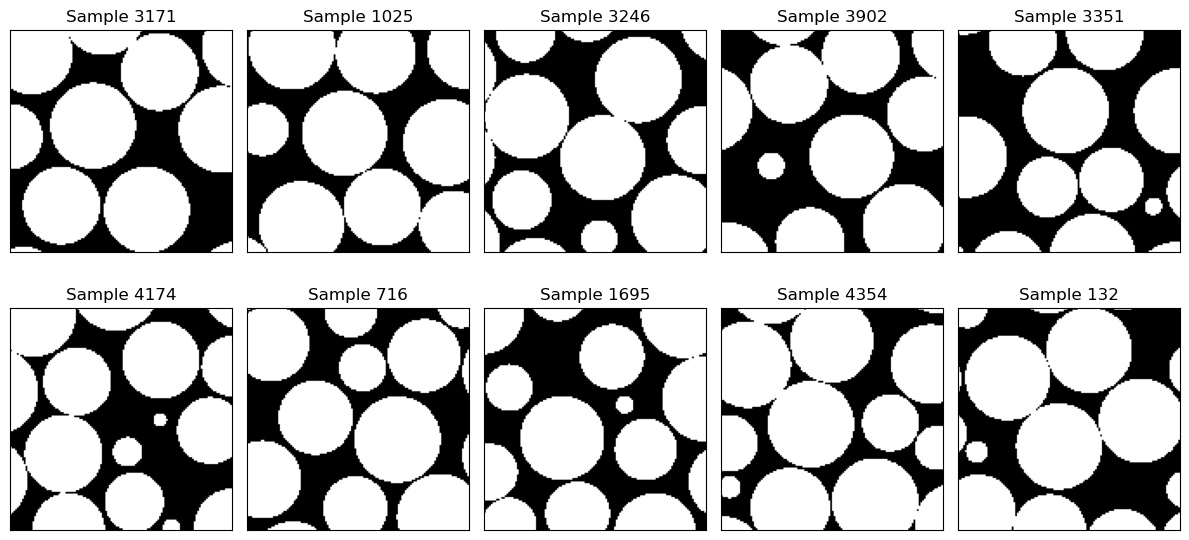

In [9]:
fig = plot_random_samples(windows, num_plots=10)  # Plot 10 random samples

## Outline for the Tutorials

We will embark on a path of simplicity, initially employing linear layers. Gradually, we will advance towards a solution that closely aligns with our main objective: generating binary rock samples.

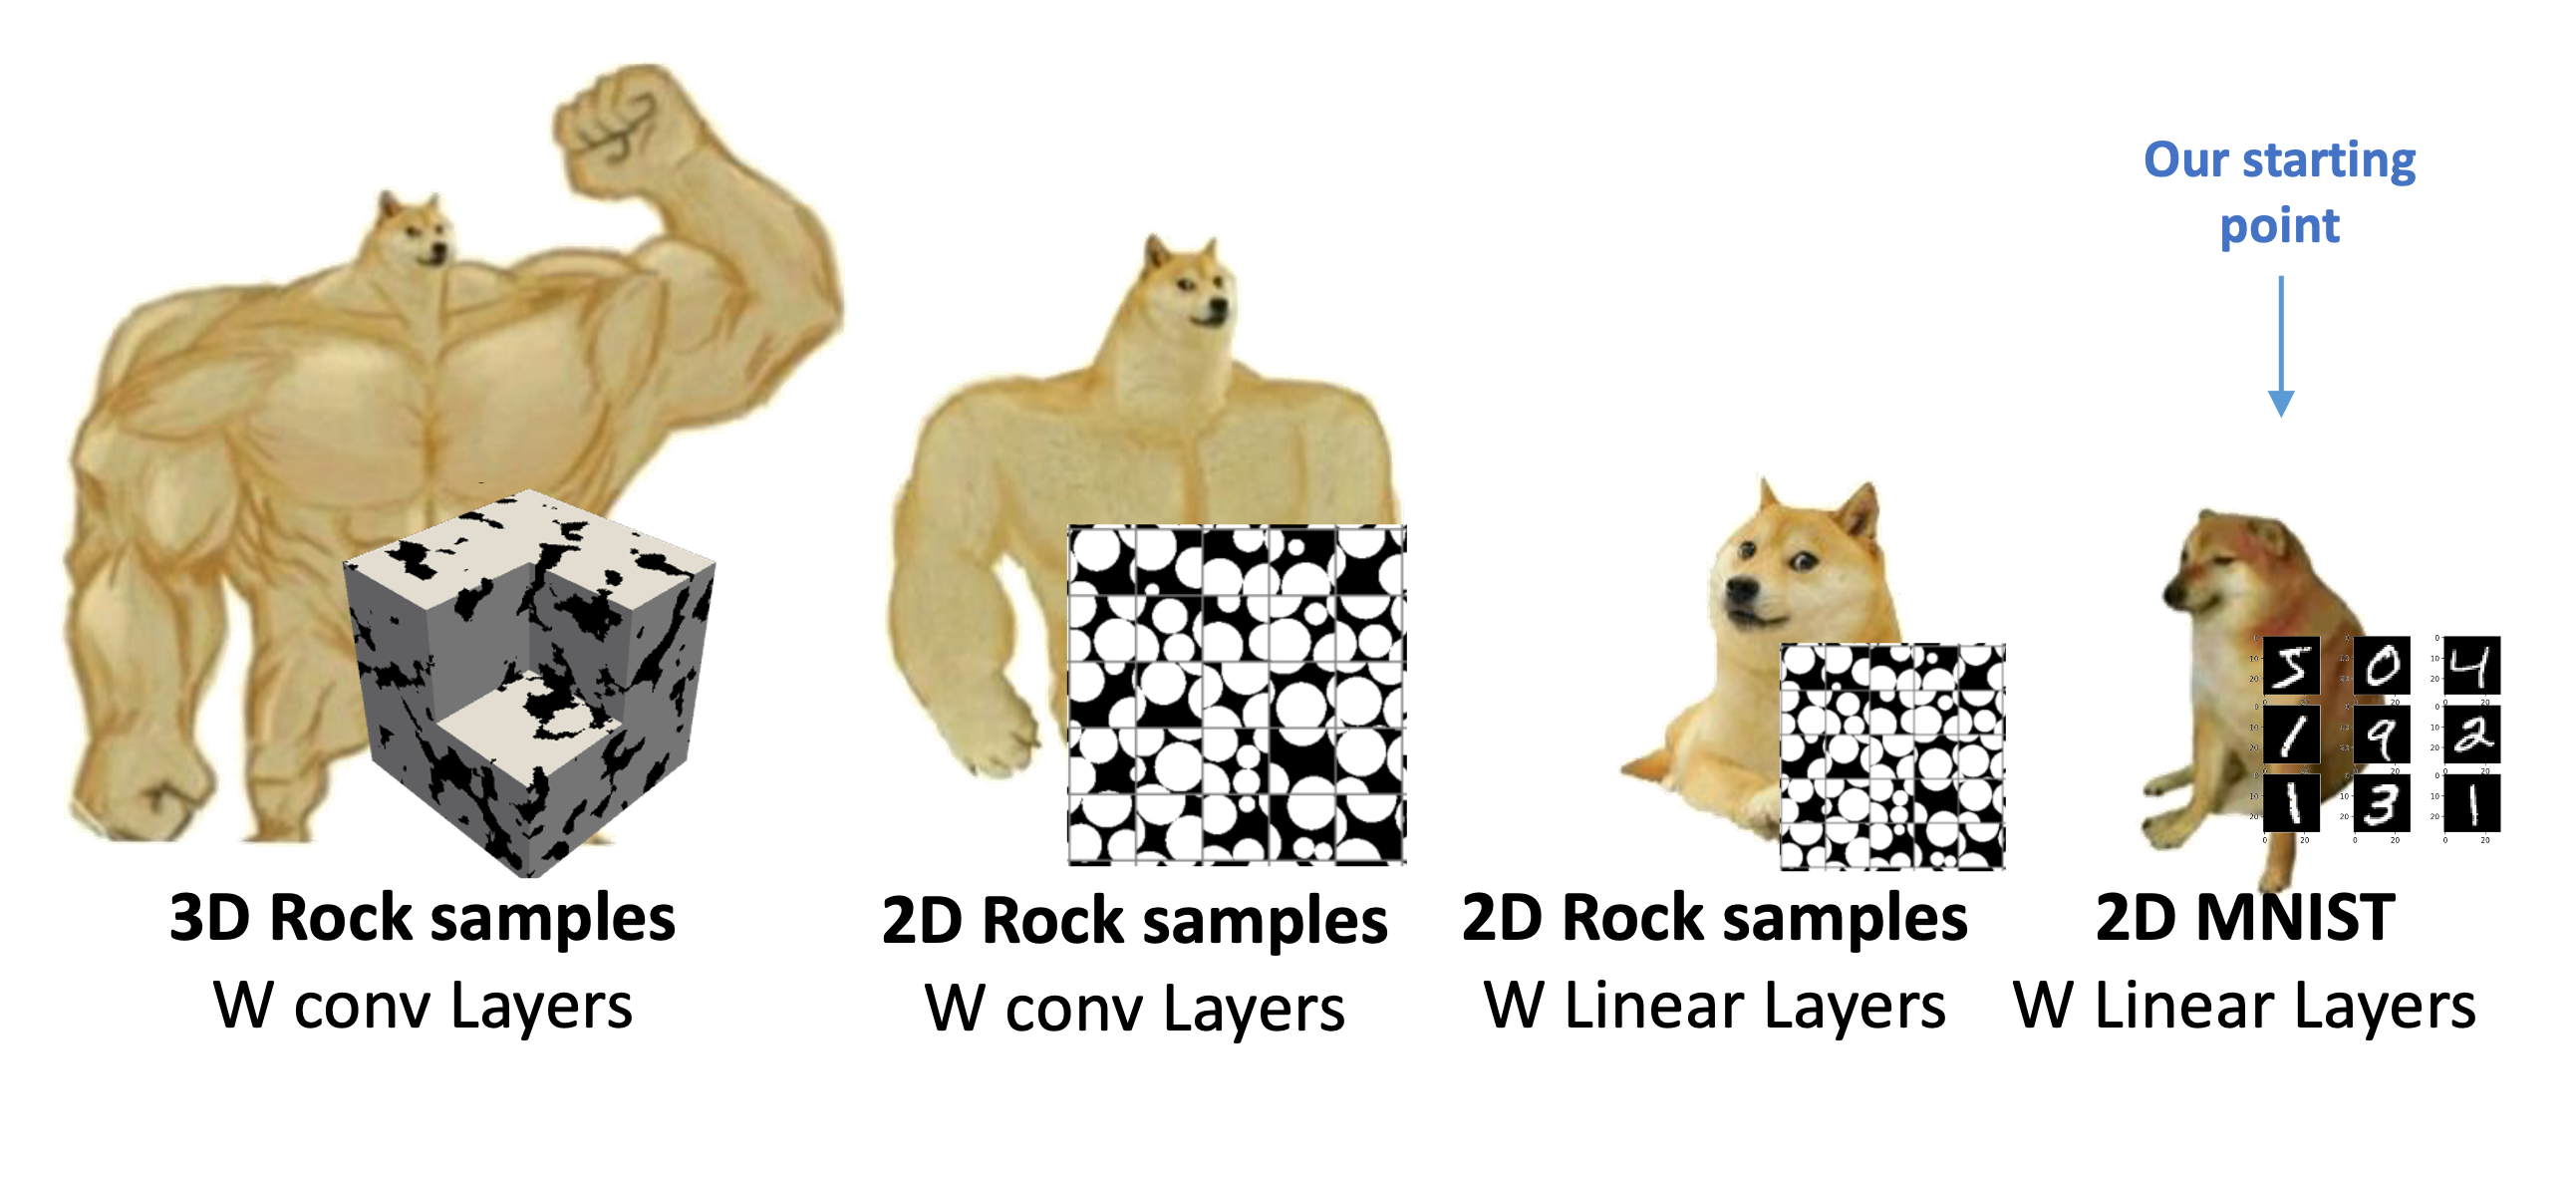

In [10]:
Image(filename='../assets/meme_1png.png',width=1200, height=600)